In [2]:
import pandas as pd

In [3]:
df = pd.read_excel("0623_300Microns.xlsx")
df

,Cab.Bridge,Voltage steps,V(PZT),Real_V,M-E Sensor,ME_D,ME_A_dis,Fringes,Fringe_D,fringe_A_dis,Time
0,31417,NaN,0.926,9.26,300.20,NaN,NaN,NaN,NaN,NaN,01:41:00
1,31517,100.0,1.247,12.47,301.88,1.68,1.68,5.0,1.5820,1.5820,01:43:00
2,31617,100.0,1.525,15.25,303.58,1.70,3.38,5.0,1.5820,3.1640,01:45:00
3,32817,1200.0,3.856,38.56,323.65,20.07,23.45,49.0,15.5036,18.6676,01:48:00
4,33017,200.0,4.310,43.10,327.64,3.99,27.44,11.0,3.4804,22.1480,01:50:00
5,33417,400.0,5.160,51.60,335.69,8.05,35.49,20.0,6.3280,28.4760,01:55:00
6,33817,400.0,6.050,60.50,343.79,8.10,43.59,18.0,5.6952,34.1712,01:57:00
7,34217,400.0,6.830,68.30,351.91,8.12,51.71,22.0,6.9608,41.1320,01:59:00
8,34617,400.0,7.760,77.60,360.07,8.16,59.87,16.0,5.0624,46.1944,02:03:00
9,35017,400.0,8.630,86.30,368.32,8.25,68.12,24.0,7.5936,53.7880,02:12:00


In [4]:

#indexing rows 5-19 b/c these rows contain 400 voltage steps between each
ME_A_dis = df["ME_A_dis"][5:20]
print(ME_A_dis)

5     35.49
6     43.59
7     51.71
8     59.87
9     68.12
10    59.90
11    51.75
12    43.64
13    35.54
14    27.49
15    20.50
16    13.68
17    13.69
18     6.89
19     0.12
Name: ME_A_dis, dtype: float64


In [5]:

#indexing same rows as ME_A-dis, 400 voltage steps for about 20 fringes each
fringe_A_dis = df["fringe_A_dis"][5:20]
print(fringe_A_dis)

5     28.4760
6     34.1712
7     41.1320
8     46.1944
9     53.7880
10    46.1944
11    38.9172
12    31.0072
13    23.7300
14    16.7692
15     9.1756
16     1.8984
17    -4.7460
18   -11.3904
19   -17.7184
Name: fringe_A_dis, dtype: float64


In [6]:

real_V = df["Real_V"][5:20]
print(real_V)

5     51.60
6     60.50
7     68.30
8     77.60
9     86.30
10    70.60
11    58.10
12    47.10
13    37.00
14    27.69
15    20.25
16    13.08
17    13.75
18     6.42
19     0.27
Name: Real_V, dtype: float64


In [7]:
import matplotlib.pyplot as plt
plt.close("all")
%matplotlib notebook

In [8]:
import numpy as np

In [9]:
from scipy import stats

In [10]:
x = fringe_A_dis
y = ME_A_dis

In [11]:
info = stats.linregress(x,y)
print(info)

LinregressResult(slope=0.9272895942336585, intercept=14.595209715615336, rvalue=0.9909961247980973, pvalue=9.72243147921219e-13, stderr=0.034747350471821335, intercept_stderr=1.087975218451376)


<IPython.core.display.Javascript object>


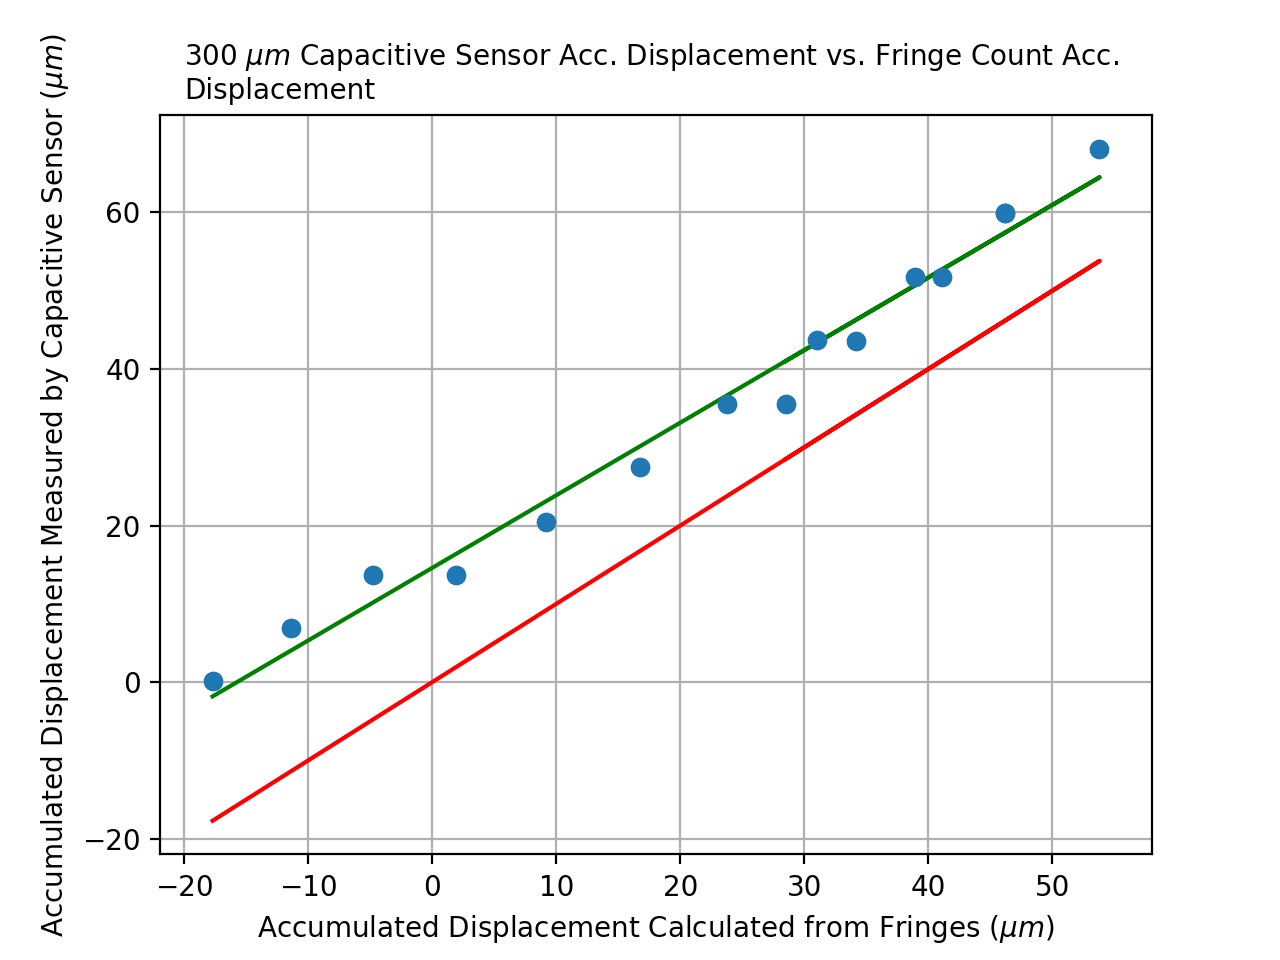

<function matplotlib.pyplot.show(block=None)>

In [13]:

#x error is 0.6
xerror = np.full_like(x,0.6)
yerror = np.full_like(y,0)

plt.scatter(x,y)

# plot of linear regression of data
plt.plot(x,x*info.slope+info.intercept,c = "green")

# plot of fringe displacement data, our "true" measurement
plt.plot(x,x,c = "red")

plt.errorbar(x,y,xerr=xerror,yerr=yerror,fmt = 'o',)



plt.xlabel('Accumulated Displacement Calculated from Fringes ($\mu m$)')
plt.ylabel('Accumulated Displacement Measured by Capacitive Sensor ($\mu m$)')
t = '300 $\mu m$ Capacitive Sensor Acc. Displacement vs. Fringe Count Acc. Displacement'
plt.text(-20, 75, t, ha='left', rotation=0, wrap=True)




plt.grid()
plt.show


<IPython.core.display.Javascript object>


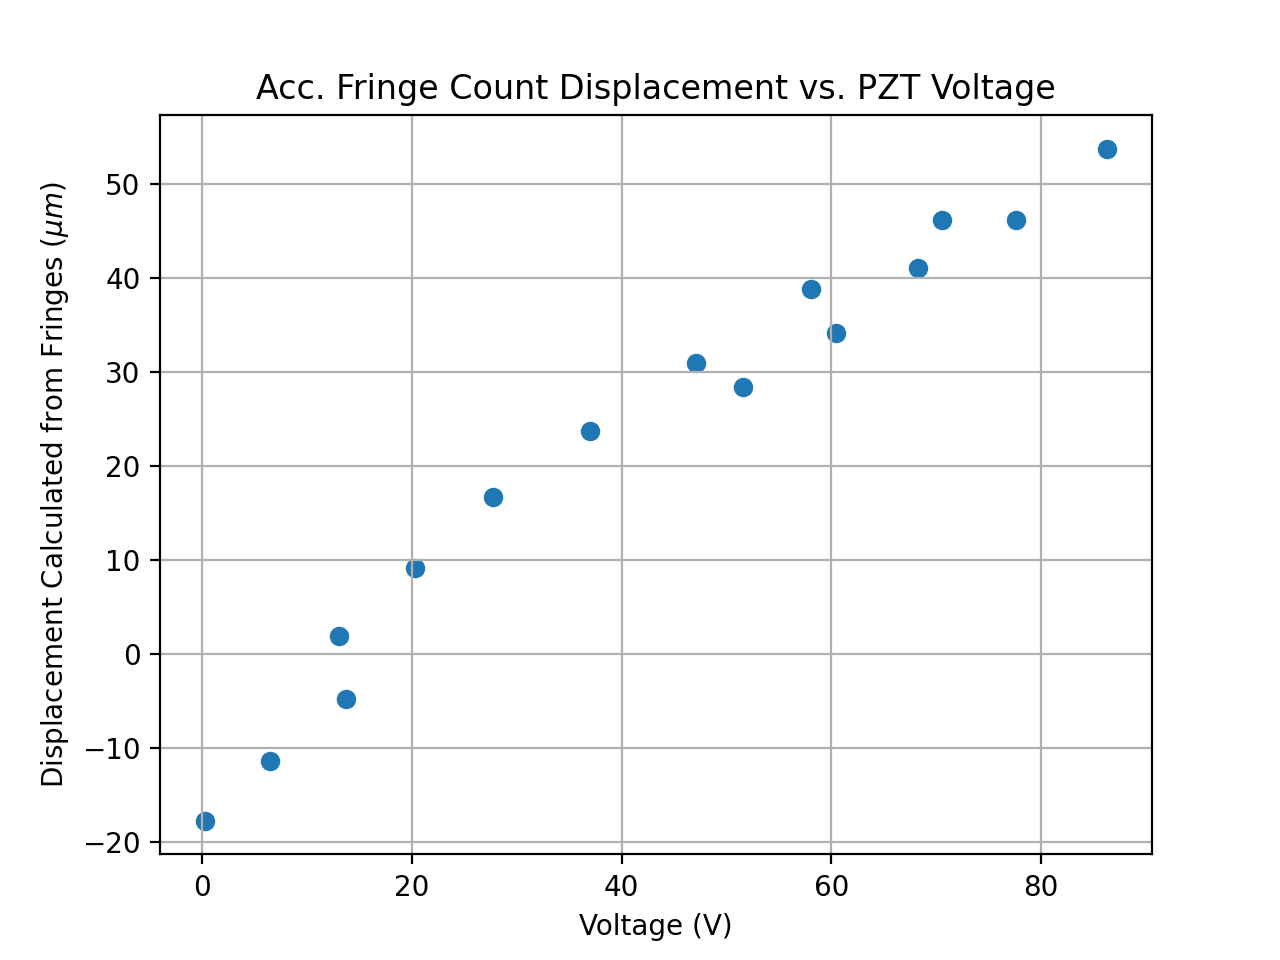

<function matplotlib.pyplot.show(block=None)>

In [16]:
plt.close("all")
x = real_V
y = fringe_A_dis

plt.scatter(x,y)

plt.xlabel('Voltage (V)')
plt.ylabel('Acc. Displacement Calculated from Fringes ($\mu m$)')
plt.title('Acc. Fringe Count Displacement vs. PZT Voltage')

plt.grid()
plt.show